<a href="https://colab.research.google.com/github/alitd786/Ali-Asghar-T.D./blob/main/Ali_Asghar_Model_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import train_test_split function from sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import OneHotEncoder from sklearn for converting categorical variable(s) into a form that could be provided to ML algorithms
from sklearn.preprocessing import OneHotEncoder
# Import DecisionTreeClassifier from sklearn for creating a decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier from sklearn for creating a random forest classifier model
from sklearn.ensemble import RandomForestClassifier
# Import accuracy_score from sklearn to compute the accuracy of a classification model

from sklearn.metrics import accuracy_score

# Import pandas library for data manipulation and analysis
import pandas as pd
# Import numpy library for numerical operations
import numpy as np
# Import seaborn library for statistical data visualization
import seaborn as sns
# Import pyplot from matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Suppress warnings (useful to keep the output clean in case of using deprecated features or any other warnings)
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

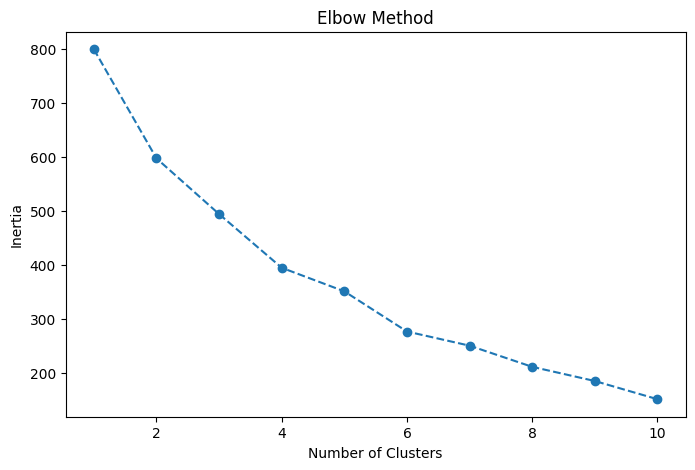

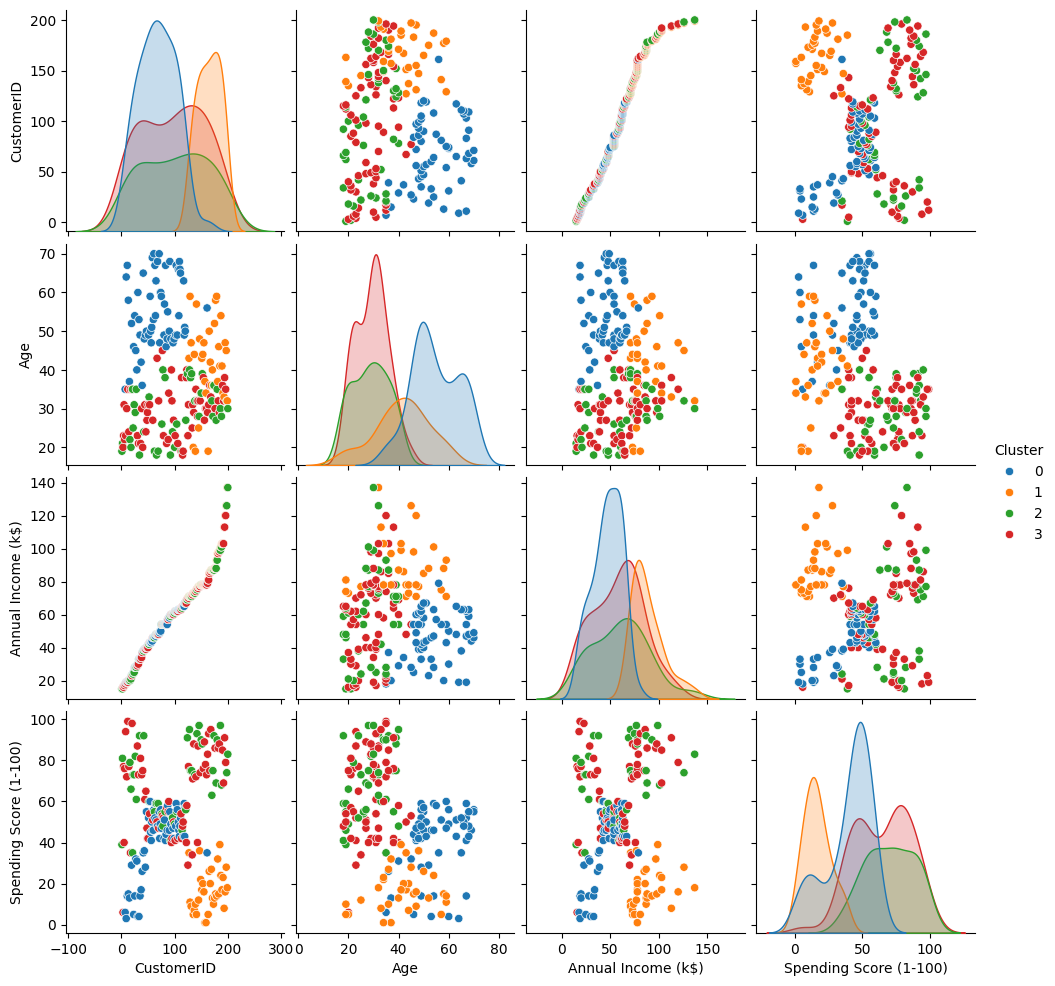

In [22]:
# File: clustering_unsupervised_learning.py

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming `df` is already loaded
# Example: df = pd.read_csv('data.csv')

# Step 1: Drop unnecessary columns
df_cleaned = df.drop(columns=['CustomerID'])

# Step 2: Feature Encoding (if needed)
# If Gender is categorical, encode it
if df_cleaned['Gender'].dtype == 'object':
    df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Step 4: Determine the optimal number of clusters (Elbow Method)
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Apply K-Means with optimal clusters
optimal_clusters = 4  # Replace with the number determined by the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Step 6: Visualize the clusters
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

# Optional: Save the clustered data
df.to_csv('clustered_data.csv', index=False)

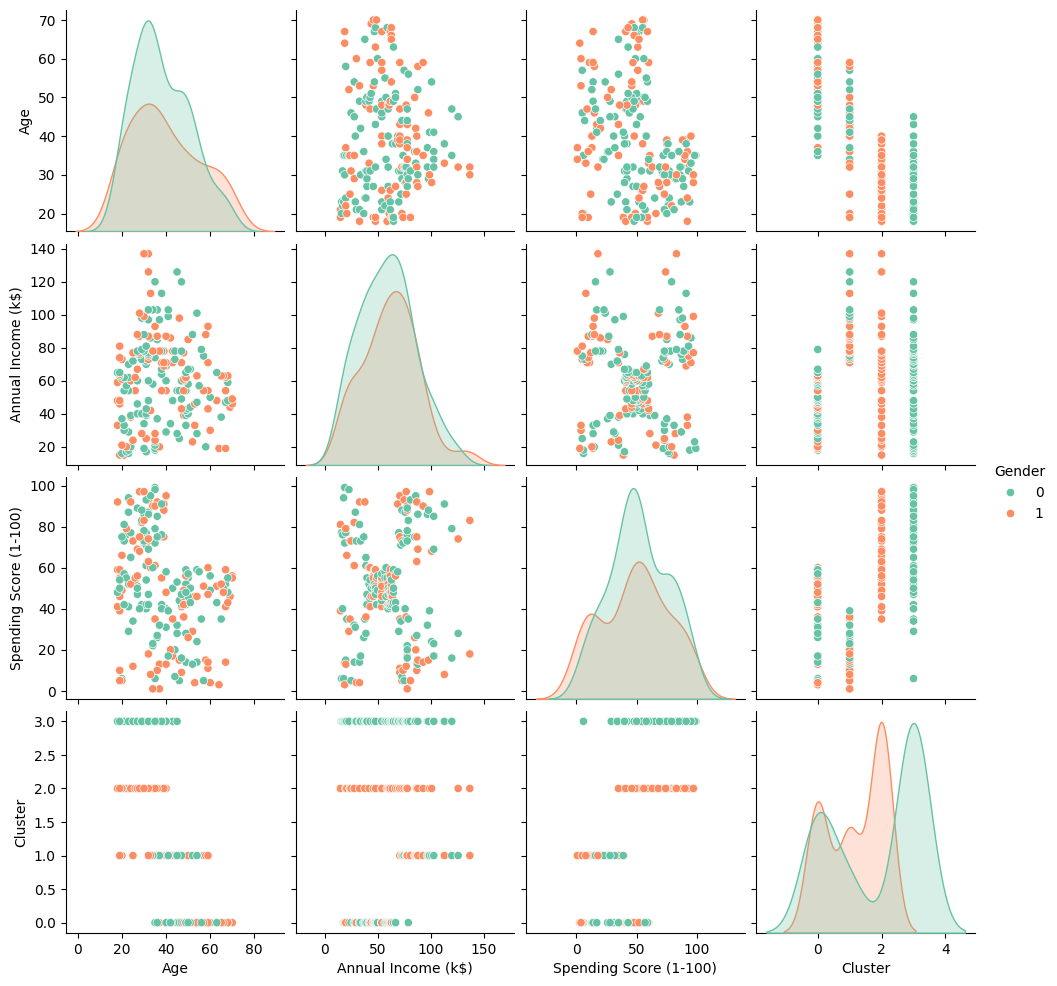

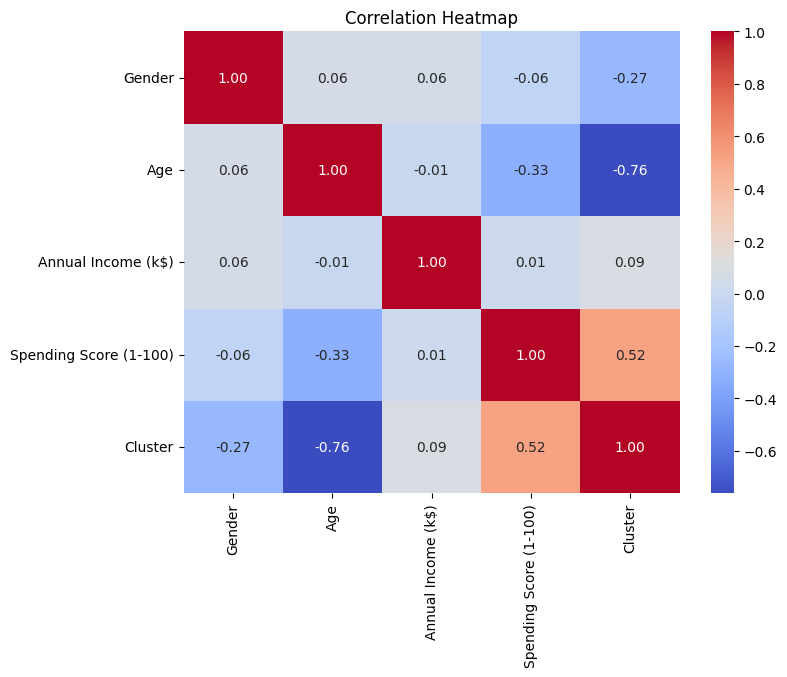

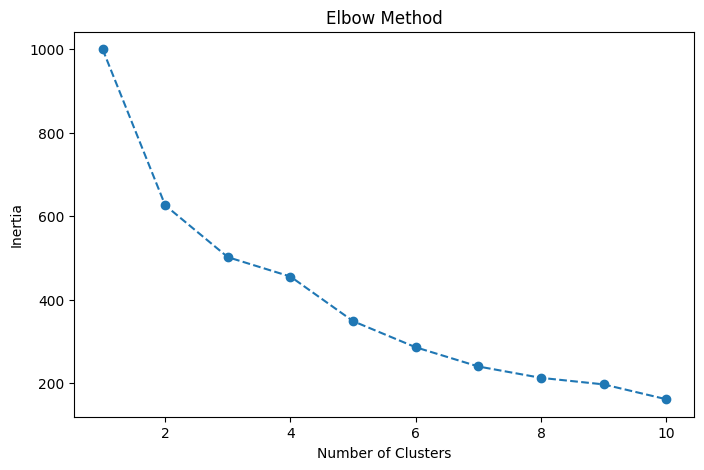

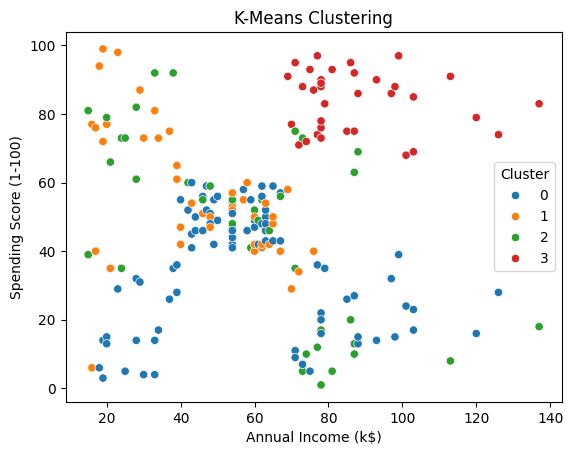

Mean Squared Error: 480.673141707248
Anomalies detected: 10


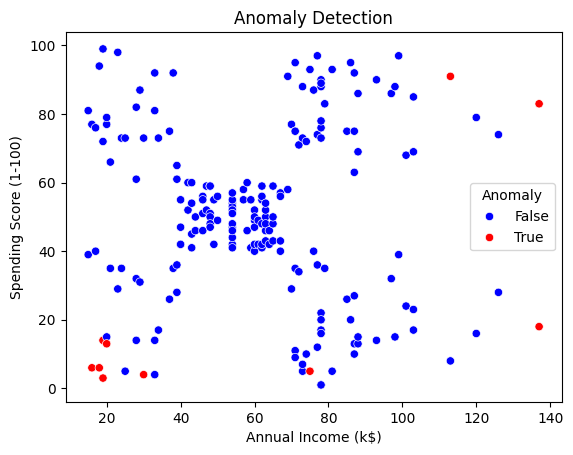

Recommendations by Cluster:
Cluster 2: {'Average Income': 59.523809523809526, 'Average Spending': 46.95238095238095}
Cluster 1: {'Average Income': 44.74418604651163, 'Average Spending': 56.02325581395349}
Cluster 0: {'Average Income': 58.06172839506173, 'Average Spending': 34.7037037037037}
Cluster 3: {'Average Income': 87.79411764705883, 'Average Spending': 83.76470588235294}


In [23]:
# File: customer_analysis.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Load the dataset
# Assuming df is already loaded
# Example: df = pd.read_csv('data.csv')

def preprocess_data(df):
    """Preprocess the data by encoding categorical features and scaling."""
    # Encode Gender
    if df['Gender'].dtype == 'object':
        le = LabelEncoder()
        df['Gender'] = le.fit_transform(df['Gender'])

    # Drop CustomerID
    df_cleaned = df.drop(columns=['CustomerID'], errors='ignore')

    # Scale numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_cleaned)

    return df_cleaned, scaled_data

def eda_plots(df):
    """Perform basic EDA and visualizations."""
    # Pairplot to observe relationships
    sns.pairplot(df, hue='Gender', diag_kind='kde', palette='Set2')
    plt.show()

    # Heatmap for correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

def perform_clustering(scaled_data, df):
    """Perform K-Means clustering and visualize the elbow method."""
    inertia = []
    range_clusters = range(1, 11)

    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(range_clusters, inertia, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Apply KMeans with optimal clusters
    optimal_clusters = 4  # Replace with the actual number from the elbow method
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualize the clusters
    sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='tab10')
    plt.title('K-Means Clustering')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

    return df

def regression_model(df):
    """Build and evaluate a regression model to predict Spending Score."""
    X = df[['Age', 'Annual Income (k$)', 'Gender']]
    y = df['Spending Score (1-100)']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    return model

def anomaly_detection(df, scaled_data):
    """Detect anomalies using Isolation Forest."""
    model = IsolationForest(contamination=0.05, random_state=42)
    anomalies = model.fit_predict(scaled_data)

    df['Anomaly'] = np.where(anomalies == -1, True, False)
    print(f"Anomalies detected: {df['Anomaly'].sum()}")

    # Plot anomalies
    sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Anomaly'], palette={True: 'red', False: 'blue'})
    plt.title('Anomaly Detection')
    plt.show()

    return df

def recommendation_by_clusters(df):
    """Provide recommendations based on clusters."""
    recommendations = {}
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        recommendations[cluster] = {
            'Average Income': cluster_data['Annual Income (k$)'].mean(),
            'Average Spending': cluster_data['Spending Score (1-100)'].mean(),
        }

    print("Recommendations by Cluster:")
    for cluster, data in recommendations.items():
        print(f"Cluster {cluster}: {data}")

# Main Execution
if __name__ == "__main__":
    # Preprocessing
    df_cleaned, scaled_data = preprocess_data(df)

    # EDA
    eda_plots(df_cleaned)

    # Clustering
    df_with_clusters = perform_clustering(scaled_data, df)

    # Regression
    regression_model(df_with_clusters)

    # Anomaly Detection
    df_with_anomalies = anomaly_detection(df_with_clusters, scaled_data)

    # Recommendations
    recommendation_by_clusters(df_with_anomalies)